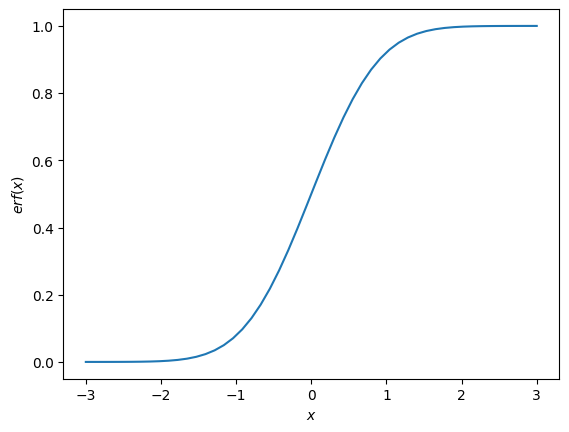

In [3]:
import numpy as np

from scipy import special

import matplotlib.pyplot as plt

x = np.linspace(-3, 3)

plt.plot(x, 0.5 * (1 + special.erf(x)))

plt.xlabel('$x$')

plt.ylabel('$erf(x)$')

plt.show()

In [4]:
from scipy.stats import norm

In [19]:
from scipy.optimize import minimize_scalar

In [8]:
norm.cdf(0, loc=0.0, scale = 1)

0.5

In [58]:
class Classifier:
    def __init__(self, skill, selectivity):
        self.skill = skill
        self.selectivity = selectivity

        #distribution of Y = 0 (reject) given X (data)
        self.false = lambda x: norm.cdf(x, loc=0.0, scale=1.0)
        #distribution of Y = 1 (accept) given X (data)
        self.true = lambda x: norm.cdf(x, loc=skill, scale=1.0)
        #data rejected given a threshold
        self.reject = lambda x: (self.false(x) + self.true(x)) / 2.0
        #data accepted given a threshold
        self.accept = lambda x: 1.0 - self.reject(x)
        self.ratio_fn = lambda x: self.accept(x) / self.reject(x)
        self.threshold = self.solve_ratio()

        self.tn = self.false(self.threshold) / 2.0
        self.fn = self.true(self.threshold) / 2.0
        self.tp = (1.0 - self.true(self.threshold)) / 2.0
        self.fp = (1.0 - self.false(self.threshold)) / 2.0

        self.confusion = np.array([[self.tn, self.fn], [self.fp, self.tp]])

    def solve_ratio(self):
        opt_fn = lambda x: np.abs(self.selectivity - self.ratio_fn(x))
        soln = minimize_scalar(opt_fn, bounds=(0.0, 20.0))
        if soln.success:
            return soln.x
        else:
            print("Solving for classification threshold failed")
            


In [64]:
c1 = Classifier(3.0, 0.05)

In [65]:
c1.threshold

4.309220099971419

In [66]:
c1.confusion

array([[4.99995904e-01, 4.52385049e-01],
       [4.09578149e-06, 4.76149514e-02]])

In [ ]:
#beta is high since the threshold is far to the right to get high rejection

In [67]:
np.sum(c1.confusion)

1.0